<a href="https://colab.research.google.com/github/bahgat-ahmed/Exploratory-Data-Analysis---Machine-Learning---Deep-Learning/blob/main/Uber%20Data%20Exploratory%20Data%20Analysis%20(EDA)/Uber_Data_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 . Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set the default seaborn style for our plots
sns.set()

import scipy.stats as stats
import copy
import warnings

warnings.filterwarnings('ignore')
# graphics in retina format
%config InlineBackend.figure_format = 'retina'

# 2. Read Data

In [2]:
uber_df = pd.read_csv('Uber Request Data.csv')
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# 3. Detect Missing Data & Do any Transformation

## 3.1 Describe Data

In [3]:
print(f"Data Shape: {uber_df.shape}")

Data Shape: (6745, 6)


**Expected output:**

The data contains 1388 examples with 7 features with the following types:
1. 1 integer feature
2. 1 float feature
3. 4 object features (2 strings & 2 datetime)

In [4]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Output is as expected. However, there is missing data in the **Driver id**, and **Drop timestamp** columns.

## 3.2 Check missing values

In [5]:
# check for null values
uber_df.isna().apply(pd.value_counts)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
False,6745.0,6745.0,4095,6745.0,6745.0,2831
True,NaN,NaN,2650,NaN,NaN,3914


You can also use:
```
uber_df.isnull().sum()
```
or
```
uber_df.isna().sum()
```

So we have:
1. 2650 missing values in **Driver id** column.
2. 3914 missing values in **Drop timestamp** column.

## 3.3 Transform Datetime columns to Uniform Datetime format

In [6]:
# transform datetime columns
uber_df['Request timestamp'] = uber_df['Request timestamp'].apply(lambda x:
                                        pd.to_datetime(x))
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].apply(lambda x:
                                        pd.to_datetime(x))

In [7]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


## 3.4 Remove Useless Column(s)

**Noise:** It is something I don't need. Something that won't benefit me at all in my analysis.

In [8]:
# number of unique values per column
uber_df.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

As we see, every **Request id** column contain a unique value so it is better to remove that useless column.

In [9]:
uber_df.drop('Request id', axis=1, inplace=True)

In [10]:
uber_df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


# 4. Numerical Data

In [11]:
# describe numerical data
uber_df.describe()

,Driver id
count,4095.000000
mean,149.501343
std,86.051994
min,1.000000
25%,75.000000
50%,149.000000
75%,224.000000
max,300.000000


## 4.1 Histogram

* Show distribution
* Help in outlier detection

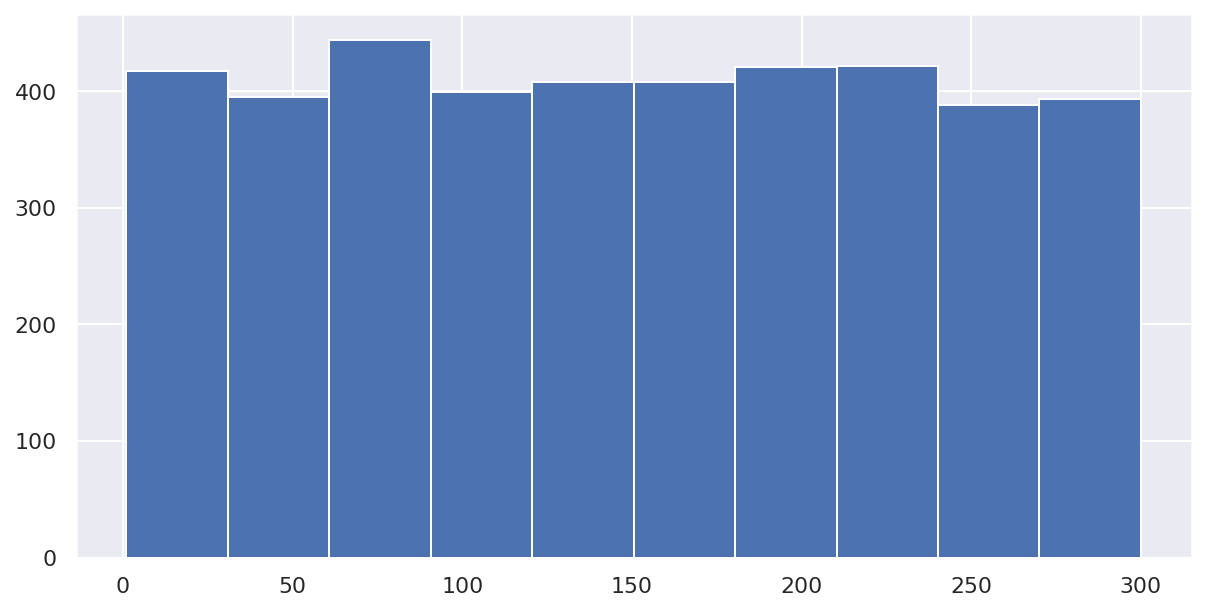

In [12]:
uber_df['Driver id'].hist(figsize=(10, 5))
plt.show()

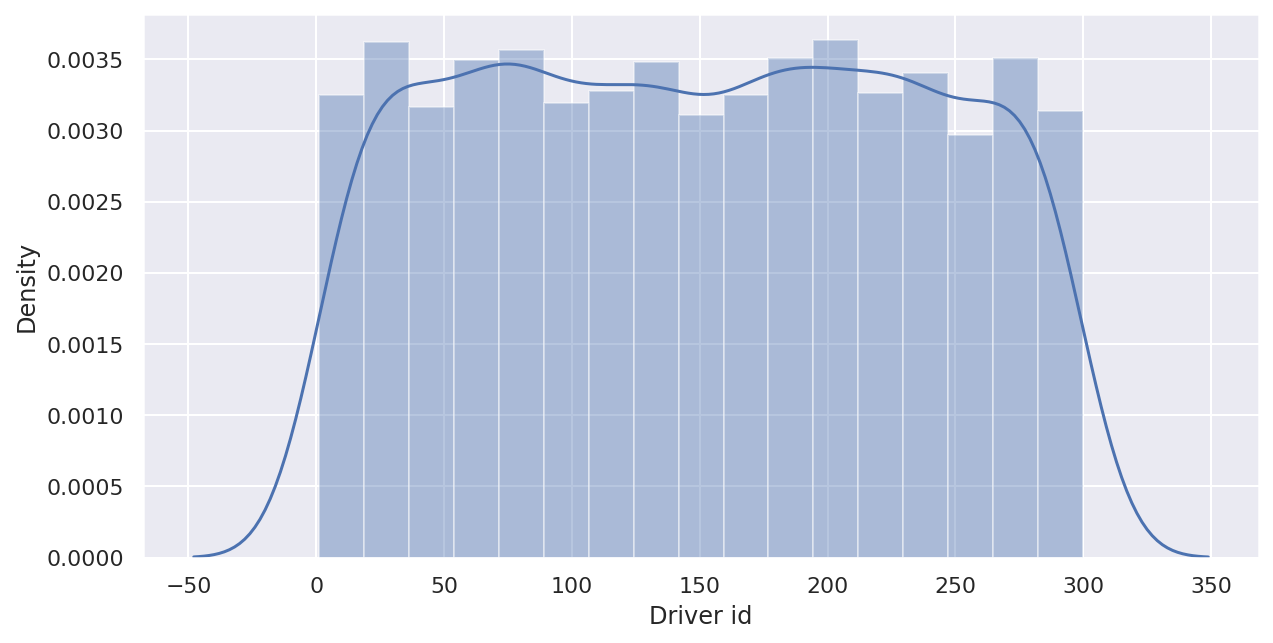

In [13]:
# we coujld also see a continuous line of the distribtion using seaborn distplot
plt.figure(figsize=(10, 5))
sns.distplot(uber_df['Driver id'])
plt.show()

Drivers are uniformly distributed so all of them are nearly working equally.

## 4.2 Histogram (Show Category)

It would be useful to faslty check the distribution per different cateogries in each of our categorical variables.

Checking categories relations to the **Driver Id** Distribution to check if some drivers are dominating certain trips, or if some trips are not completed by some drivers. This could be useful.

### 4.2.1 Driver id & Pickup point

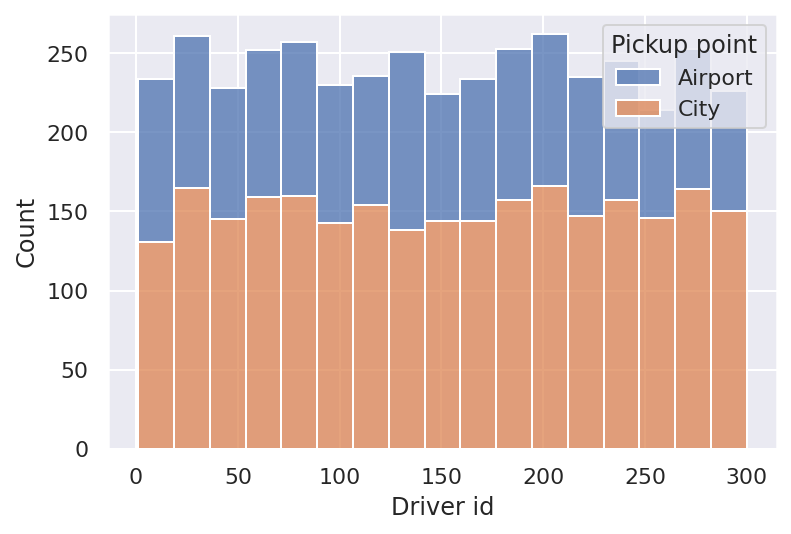

In [14]:
sns.histplot(data=uber_df, x=uber_df['Driver id'], hue='Pickup point',
             multiple='stack')
plt.show()

**Also uniform distribution. But why not check the value counts of `Pickup Point`?**

In [15]:
uber_df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

**They are very close to each other. There is nothing to detect here as far as I think.**

### 4.2.2 Driver id & Status

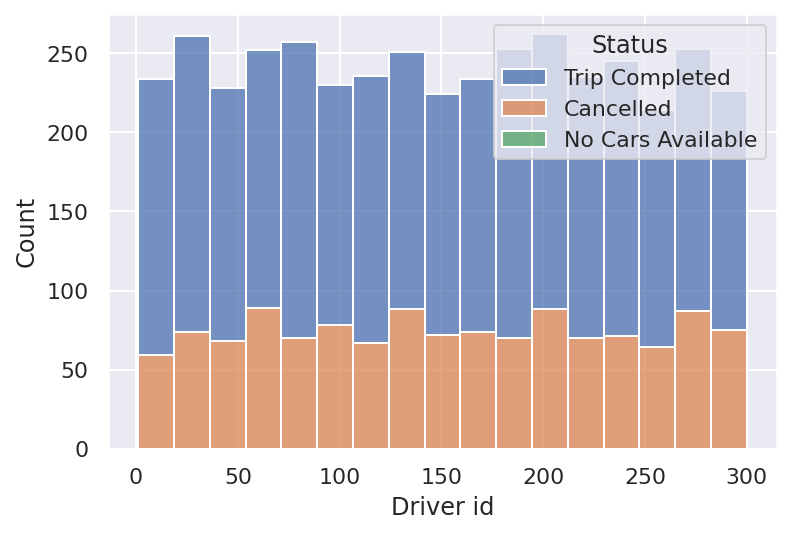

In [16]:
sns.histplot(data=uber_df, x=uber_df['Driver id'], hue='Status',
             multiple='stack')
plt.show()

**So it seems that `Driver id` don't have any unique trend. All drivers seem similar.**

## 4.3 Boxplot

* Show variance (5 summary statistics)
* Help in outlier detection

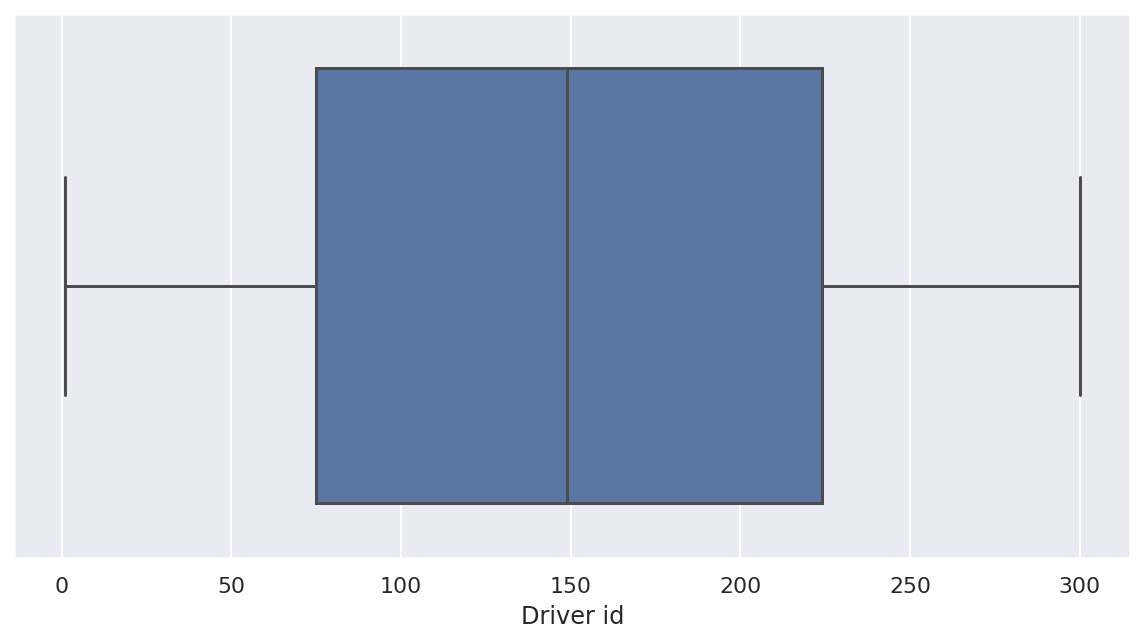

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(uber_df['Driver id'])
plt.show()

**Nothing fancy. Everything looks normal, and there are no outliers.**

# 5 Categorical Data

## 5.1 Bar Plot

### 5.1.1 Pickup point

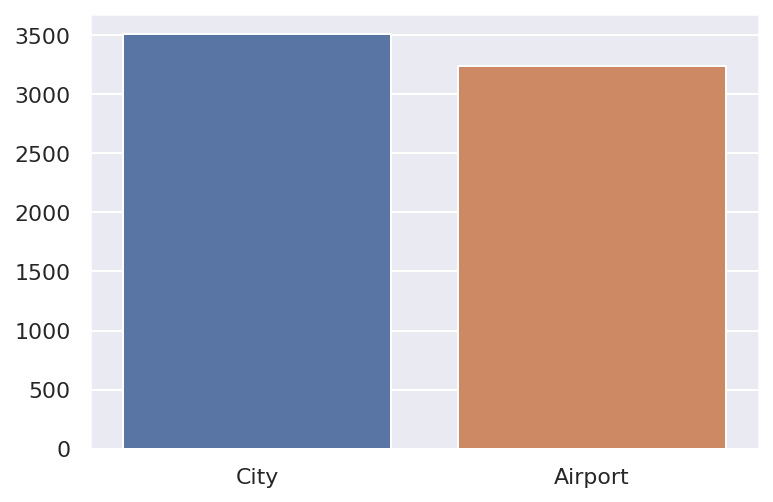

In [18]:
sns.barplot(x=uber_df['Pickup point'].value_counts().index,
            y=uber_df['Pickup point'].value_counts().values)
plt.show()

**City trips are a little bit more than Airport trips, but not a big considerable difference.**

### 5.1.2 Status

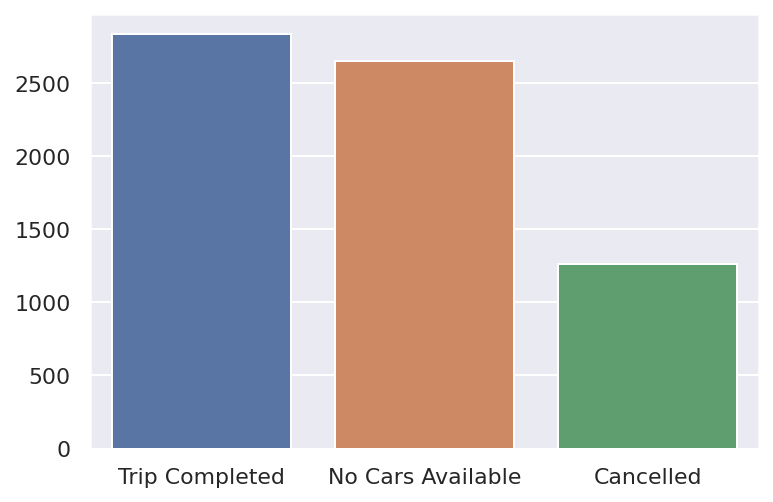

In [19]:
sns.barplot(x=uber_df['Status'].value_counts().index,
            y=uber_df['Status'].value_counts().values)
plt.show()

**There a lot of trips that were waiting for available cars. Really too much. We should do more investigation to solve this problem in the next section by using the `datetime` features.**

## 5.2 Pie Chart

### 5.2.1 Pickup point

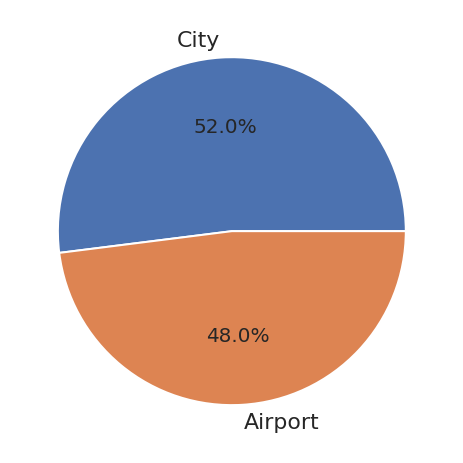

In [20]:
plt.pie(uber_df['Pickup point'].value_counts().values,
        labels=uber_df['Pickup point'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

### 5.2.2 Status

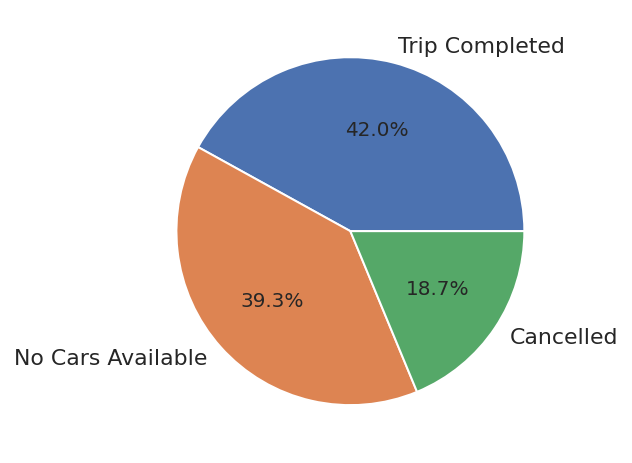

In [21]:
plt.pie(uber_df['Status'].value_counts().values,
        labels=uber_df['Status'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

**Something new here appears. About 60% of all trips are waiting for available cars or cancelled. Again this should be further investigated using other features to try solving this problem.**

# 6. `Datetime` Features

## 6.1 Extract Hours

To make `Request timestamp` features more useful, we will extract hour from it which could help us solve the problem we saw of non-available cars. That problem could be solved using the `Request timestamp`, so I will not use the `Drop timestamp`.

In [22]:
# extract hours from request timestamp
uber_df['Request hour'] = uber_df['Request timestamp'].dt.hour
uber_df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


## 6.2 Plot `hour` distribution

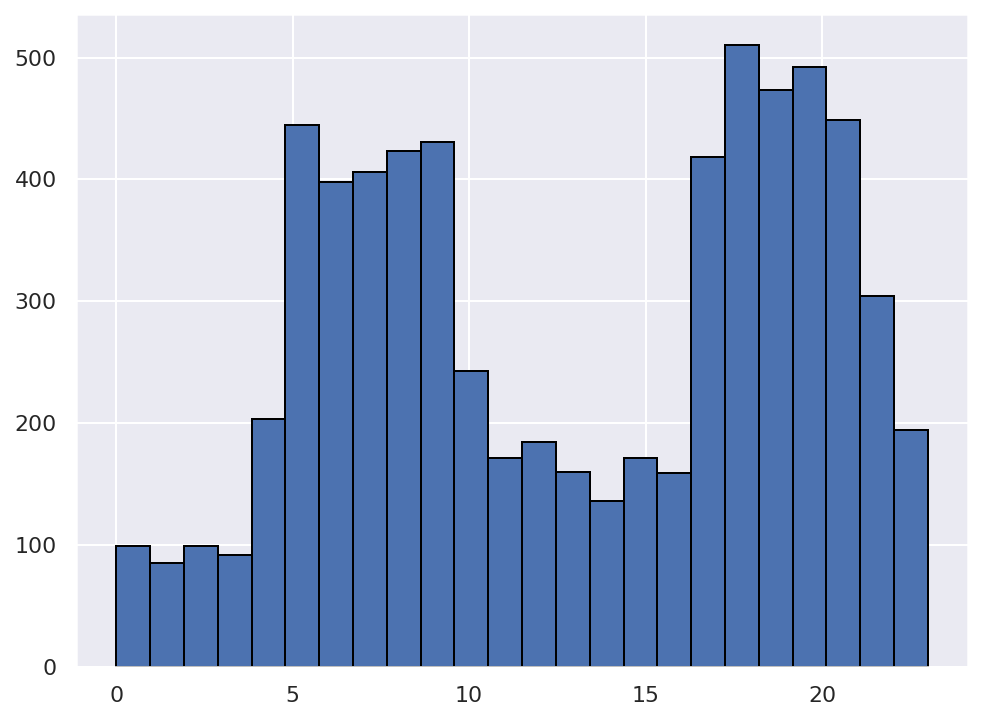

In [23]:
# let us draw a histogram to see the hours with more requests
plt.figure(figsize=(8, 6))
plt.hist(uber_df['Request hour'], edgecolor='black', bins=24)
plt.show()

Rush hours are:
* From 6 to 10 am
* From 5 to 10 pm

## 6.3 Feature Engineering (Transform Hours to Times of day)

Therefore we could make a function that transform that `Request hour` feature to categorical feature.

1. Early Morning ---> 12 am to 5 am
2. Morning ---> 5 am to 10 am
3. Day ---> 10 am to 5 pm
4. Night ---> 5 pm to 10 pm
5. Late Night ---> 10 pm to 12 am


In [24]:
def time_period(time):
    if time < 5:
        return 'Early Morning'
    elif time < 10:
        return 'Morning'
    elif time < 17:
        return 'Day'
    elif time < 22:
        return 'Night'
    else:
        return 'Late Night'

In [25]:
uber_df['Time period'] = uber_df['Request hour'].apply(lambda x: time_period(x))
uber_df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time period
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Night
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


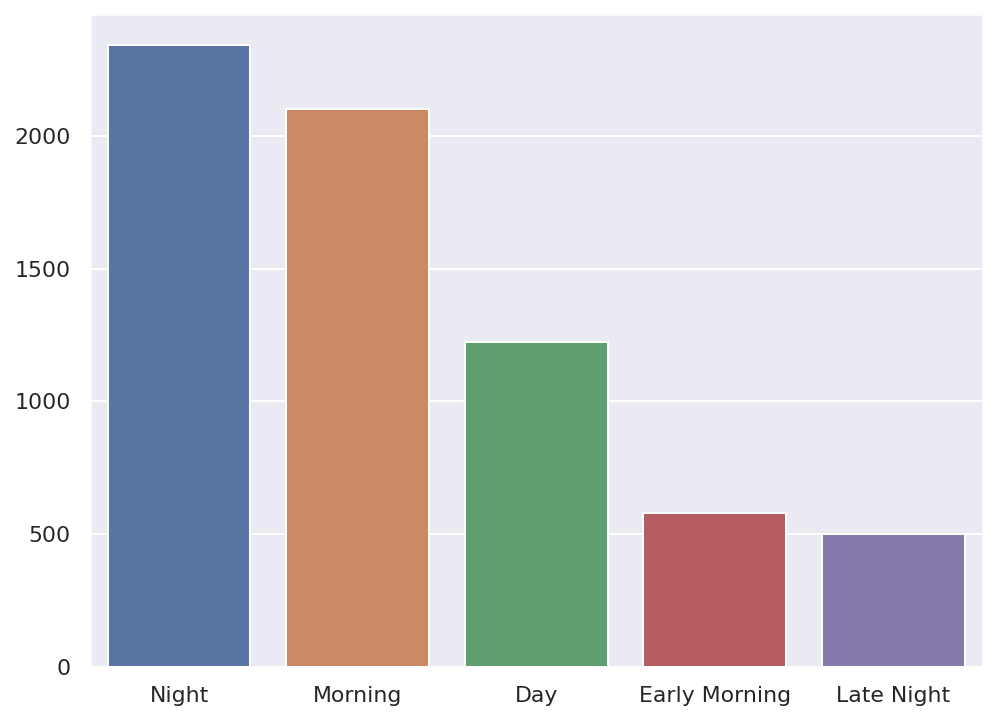

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x=uber_df['Time period'].value_counts().index,
            y=uber_df['Time period'].value_counts().values)
plt.show()

**Highest demand is at Night, and in the Morning. Therefore we could solve the previous waiting problem by increasing the number of cars in these rush hours (Night, and Morning) while decreasing them in less rush hours to serve people when they are need of service.**